# Imports

In [54]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from HANKStickyModel import HANKStickyModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
model = HANKStickyModelClass(name='baseline', par={'inattention': 0.935, 'start_dbeg_opti': False})

In [56]:
model.find_ss()

[ 0.99231676  0.99231676  0.99231676 14.78837072]
[ 0.99231676  0.99231676  0.99231676 14.78837072]
[ 0.99231676  0.99231676  0.99231676 14.78837072]
[ 0.99231677  0.99231676  0.99231676 14.78837072]
[ 0.99231676  0.99231677  0.99231676 14.78837072]
[ 0.99231676  0.99231676  0.99231677 14.78837072]
[ 0.99231676  0.99231676  0.99231676 14.78837094]
[ 0.99231676  0.99231676  0.99231676 14.78837074]
[ 0.99231676  0.99231676  0.99231676 14.78837074]
[ 0.99231676  0.99231676  0.99231676 14.78837074]


In [57]:
model.ss.L_hh

0.4916292768752156

In [58]:
model.par.beta_mean

0.992316755437405

In [60]:
model.compute_jacs(do_print=False)
model.find_IRFs()

In [64]:
model.find_transition_path(do_print=True, do_print_unknowns=False)

finding the transition path:
 it =   0 -> max. abs. error = 1.00e-03
   0.00e+00 in fisher_res
   4.65e-05 in w_res
   1.00e-03 in clearing_Y
   0.00e+00 in invest_res
   0.00e+00 in valuation_res
 it =   1 -> max. abs. error = 1.39e-04
   1.38e-04 in fisher_res
   1.19e-05 in w_res
   1.39e-04 in clearing_Y
   1.33e-04 in invest_res
   1.58e-05 in valuation_res
 it =   2 -> max. abs. error = 1.14e-05
   6.53e-06 in fisher_res
   5.38e-07 in w_res
   1.14e-05 in clearing_Y
   3.41e-06 in invest_res
   7.80e-07 in valuation_res
 it =   3 -> max. abs. error = 4.45e-07
   1.90e-08 in fisher_res
   1.15e-08 in w_res
   4.45e-07 in clearing_Y
   1.49e-07 in invest_res
   2.08e-08 in valuation_res
 it =   4 -> max. abs. error = 5.02e-08
   7.48e-09 in fisher_res
   1.13e-09 in w_res
   5.02e-08 in clearing_Y
   3.17e-08 in invest_res
   2.87e-09 in valuation_res
 it =   5 -> max. abs. error = 1.92e-09
   1.39e-10 in fisher_res
   1.44e-11 in w_res
   7.52e-10 in clearing_Y
   1.92e-09 in inv

### shocks ###


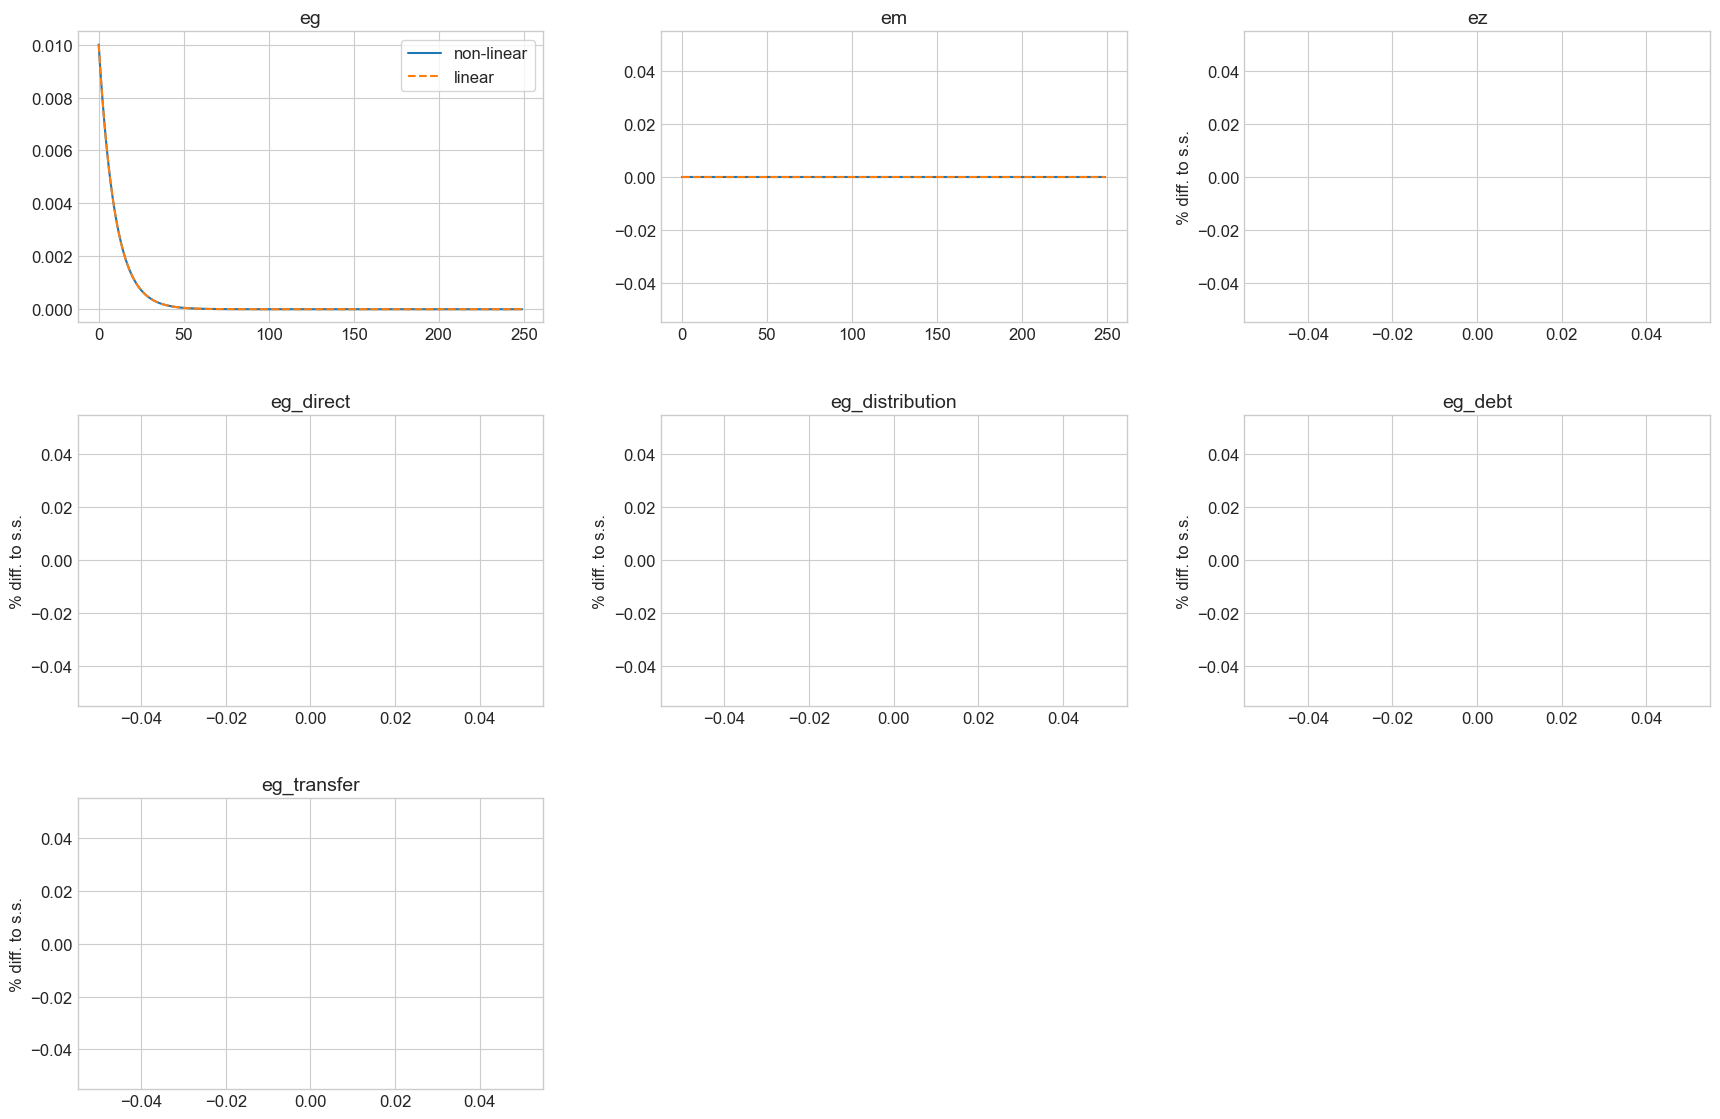


### varnames ###


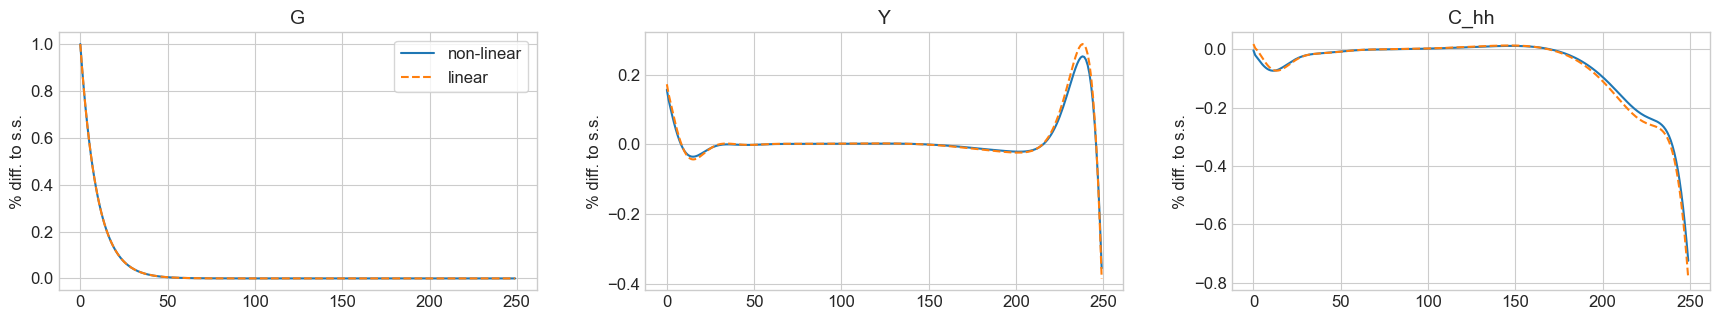


### tagets ###


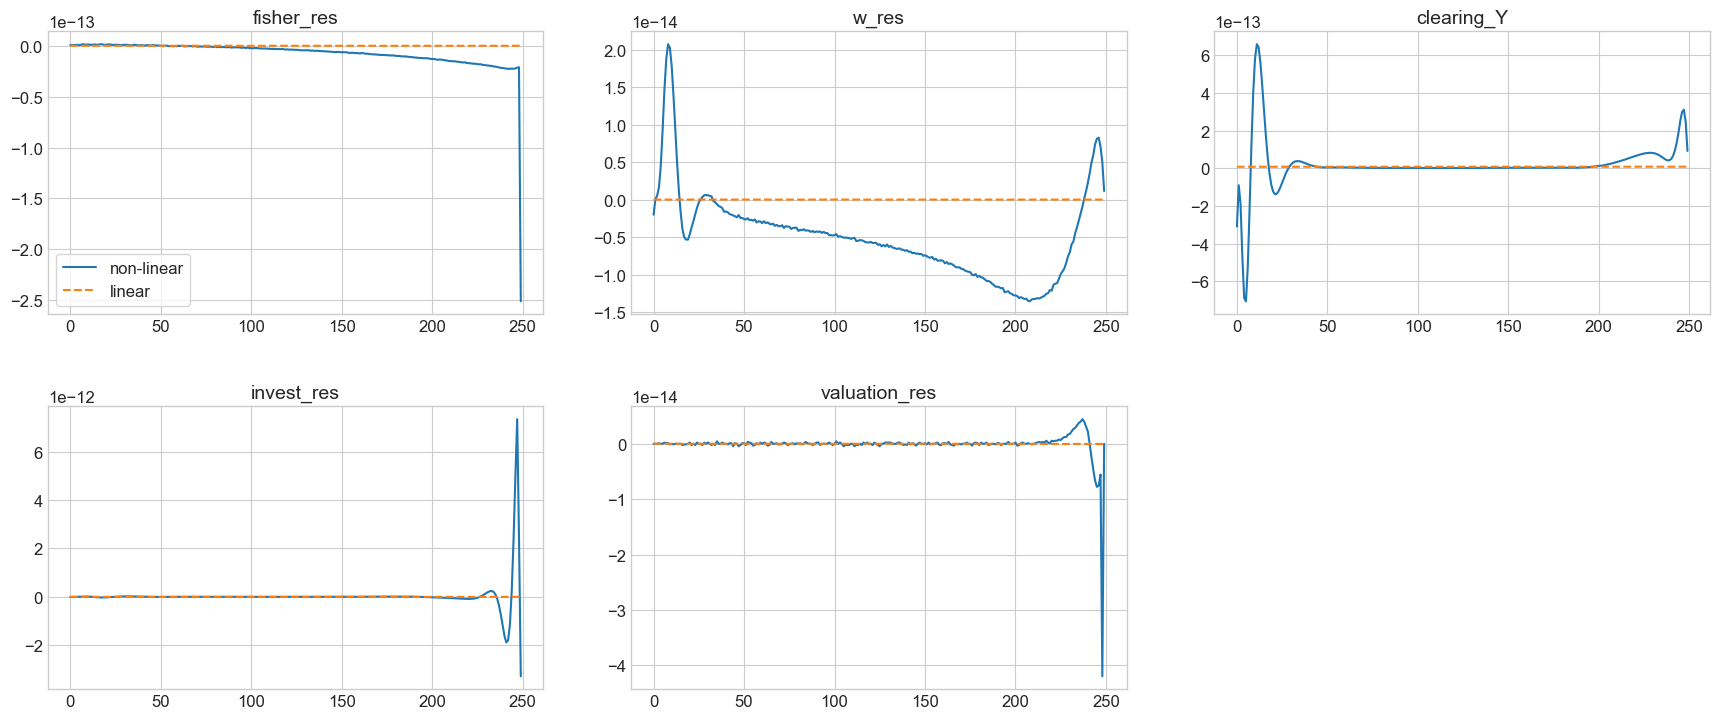

In [66]:
paths = ['G','Y','C_hh']
lvl_value = ['eg', 'em', 'i', 'Pi', 'Pi_w','clearing_Y']
abs_diff = ['r', 'ra', 'rl', 'i']
facs = {'r':100,'ra':100,'rl':100}
model.show_IRFs(paths,lvl_value=lvl_value,abs_diff=abs_diff,facs=facs,ncols=3,T_max=model.par.T,do_linear=True,do_shocks=True)

In [67]:
model.par.phi_G

0.5

# Solve the model

In [2]:
def solution_routine(model, do_print=False):
    """ solve model """
    # init model
    print('\r'+f' -------- Model: {model.name} ---------')
    # solve model
    print("\r"+'Find steady state  ',end="")
    model.find_ss(do_print=do_print)
    print("\r"+'Compute Jacobians  ',end="")
    model.compute_jacs(do_print=do_print)
    print("\r"+'Find transition path',end="")
    model.find_transition_path(do_print=do_print, do_print_unknowns=False)
    print("\r"+'Find IRFs           ',end="")
    model.find_IRFs(do_print=do_print)
    print("\r"+'Done                ',end="")
    # return model


In [16]:
model2.par.Nfix

1

# Testing

In [6]:
# model.test_hh_path()

In [7]:
# model.test_path()

In [8]:
# s_list = [0,10,20,30,40]
# model.test_jacs(s_list=s_list)

# Plotting

In [9]:
# paths = ['G','Y','C_hh']
# lvl_value = ['eg', 'em', 'i', 'Pi', 'Pi_w','clearing_Y']
# abs_diff = ['r', 'ra', 'rl', 'i']
# facs = {'r':100,'ra':100,'rl':100}
# model.show_IRFs(paths,lvl_value=lvl_value,abs_diff=abs_diff,facs=facs,ncols=3,T_max=par.T,do_linear=True,do_shocks=True)

# Misc

In [10]:
# model.print_unpack_varlist()

In [11]:
# model.check_non_lin(0)

In [12]:
# print(np.max(path.A - path.A_hh))